In [16]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv(R"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")  # Update with correct dataset
df.head()


,kroger_product,description,calories,protein,fat,carbohydrates
0,horizon organic shelf-stable 1% low fat milk b...,"strawberry milk, low fat (1%)",69.0,3.13,0.89,12.30
1,kroger® 2% reduced fat milk quart,"milk, reduced fat (2%)",50.0,3.36,1.90,4.90
2,kroger® fat free skim milk half gallon,"milk, fat free (skim)",34.0,3.43,0.08,4.92
3,kroger® vitamin d whole milk half gallon,"milk, dry, whole, with added vitamin d",1014.0,26.30,26.70,38.40
4,simple truth organic® 100% grassfed whole milk...,"simple truth organic, 100% whole wheat bread",233.0,9.30,3.49,46.50


In [10]:
df['Transaction_ID'] = df.index // 5  
transactions = df.groupby("Transaction_ID")["kroger_product"].apply(list)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.to_csv("df_encoded.csv",index=False)

In [4]:
df_encoded.head()

,16 oz millet & chia gluten free bread 4 pack,16 oz whole grain bread 3 flavor variety bundle,5 oz delicious whole wheat toast,Product_1,Product_10,Product_100,Product_101,Product_102,Product_103,Product_104,...,yoplait original vanilla flavored smooth style low fat yogurt tub,yoplait protein mixed berry yogurt cultured dairy snack cup,yoplait protein peach yogurt cultured dairy snack cup,yoplait protein strawberry yogurt cultured dairy snack cup,yoplait protein vanilla yogurt cultured dairy snack cup,yoplait protein vanilla yogurt cultured dairy snack tub,yoplait raspberry and strawberry banana kids yogurt cups,yoplait trix low fat kids yogurt cup variety pack,yummy dino buddies frozen fully cooked dinosaur shaped chicken breast nuggets,yummy® meatless plant-based dino buddies® dinosaur-shaped vegan nuggets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
print(df_encoded.sum().sum())  # Total number of "True" values
print(df_encoded.sum(axis=0).sort_values(ascending=False).head(10))  # Top 10 most common items


1219
yummy® meatless plant-based dino buddies® dinosaur-shaped vegan nuggets    1
16 oz millet & chia gluten free bread 4 pack                               1
16 oz whole grain bread 3 flavor variety bundle                            1
yoplait original low fat mountain blueberry yogurt cup                     1
yoplait original low fat key lime pie yogurt cup                           1
yoplait original low fat harvest peach yogurt cup                          1
yoplait original low fat cherry orchard yogurt cup                         1
yoplait light very vanilla fat free yogurt cup                             1
yoplait light harvest peach fat free yogurt cup                            1
yoplait light cherry fat free yogurt cup                                   1
dtype: int64


In [22]:
freq_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
print(freq_itemsets.head())


    support                                           itemsets
0  0.004098     (16 oz millet & chia gluten free bread 4 pack)
1  0.004098  (16 oz whole grain bread 3 flavor variety bundle)
2  0.004098                 (5 oz delicious whole wheat toast)
3  0.004098                                        (Product_1)
4  0.004098                                       (Product_10)


In [18]:

freq_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)  # Increased support threshold
print("Frequent itemsets:", freq_itemsets.head())


Frequent itemsets: Empty DataFrame
Columns: [support, itemsets]
Index: []


In [19]:
print(freq_itemsets)


Empty DataFrame
Columns: [support, itemsets]
Index: []


In [24]:
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.1)

# Filter out weak rules with very low support
rules_filtered = rules[rules['support'] > 0.001]  # Adjust as needed

rules_filtered.head()

rules_filtered.to_csv("rules_filtered.csv",index=False)


In [27]:
rules_filtered = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\rules_filtered.csv")

# Check top rules
print(rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                                         antecedents  \
0  frozenset({'16 oz whole grain bread 3 flavor v...   
1  frozenset({'16 oz millet & chia gluten free br...   
2                   frozenset({'bimbo white bread'})   
3  frozenset({'16 oz millet & chia gluten free br...   
4  frozenset({'16 oz millet & chia gluten free br...   
5  frozenset({"king's hawaiian® original sweet di...   
6     frozenset({'mestemacher bread protein bread'})   
7  frozenset({'16 oz millet & chia gluten free br...   
8  frozenset({'16 oz whole grain bread 3 flavor v...   
9                   frozenset({'bimbo white bread'})   

                                         consequents   support  confidence  \
0  frozenset({'16 oz millet & chia gluten free br...  0.004098         1.0   
1  frozenset({'16 oz whole grain bread 3 flavor v...  0.004098         1.0   
2  frozenset({'16 oz millet & chia gluten free br...  0.004098         1.0   
3                   frozenset({'bimbo white bread'})  0.004098         

In [32]:
rules_filtered['support'] = (rules_filtered['support'] * 1000).round(2)  # Scale up


In [33]:
rules_filtered['lift'] = np.log1p(rules_filtered['lift'])  # Log-transform lift


In [34]:
node_size = 3000  # Reduce node size
edge_widths = [max(G[u][v]['weight'] * 0.3, 0.5) for u, v in G.edges()]  # Reduce edge width

c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Const

NameError: name 'G' is not defined

In [38]:
print(rules_filtered.head())  # Check if filtering worked
print(rules_filtered.columns)  # Verify 'support' exists


                                         antecedents  \
0  (16 oz whole grain bread 3 flavor variety bundle)   
1     (16 oz millet & chia gluten free bread 4 pack)   
2                                (bimbo white bread)   
3     (16 oz millet & chia gluten free bread 4 pack)   
4     (16 oz millet & chia gluten free bread 4 pack)   

                                         consequents  antecedent support  \
0     (16 oz millet & chia gluten free bread 4 pack)            0.004098   
1  (16 oz whole grain bread 3 flavor variety bundle)            0.004098   
2     (16 oz millet & chia gluten free bread 4 pack)            0.004098   
3                                (bimbo white bread)            0.004098   
4     (king's hawaiian® original sweet dinner rolls)            0.004098   

   consequent support   support  confidence   lift  leverage  conviction  \
0            0.004098  0.004098         1.0  244.0  0.004082         inf   
1            0.004098  0.004098         1.0  244.0  0.

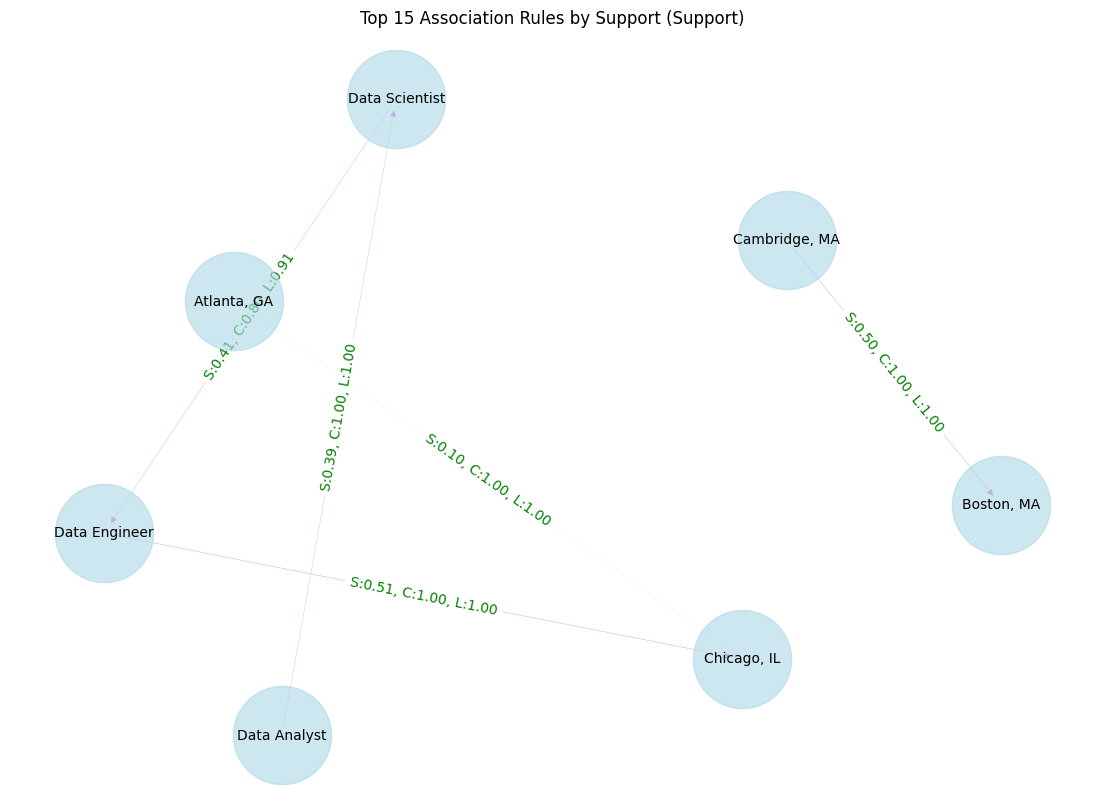

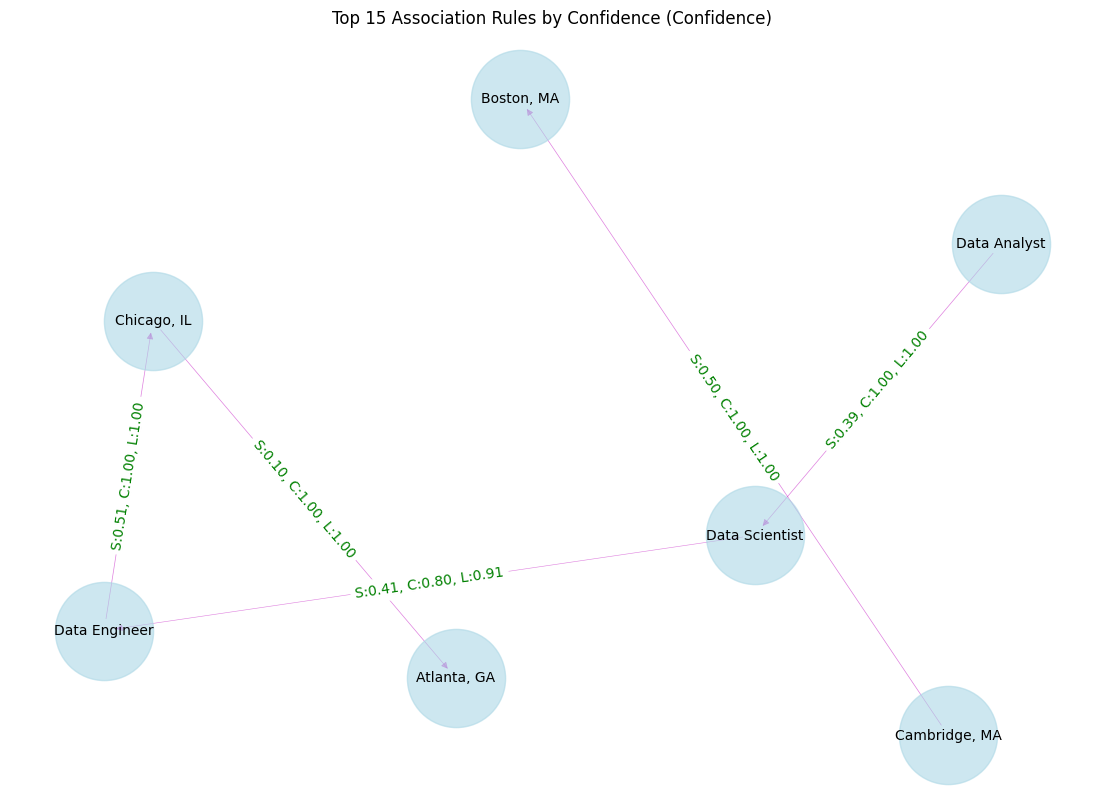

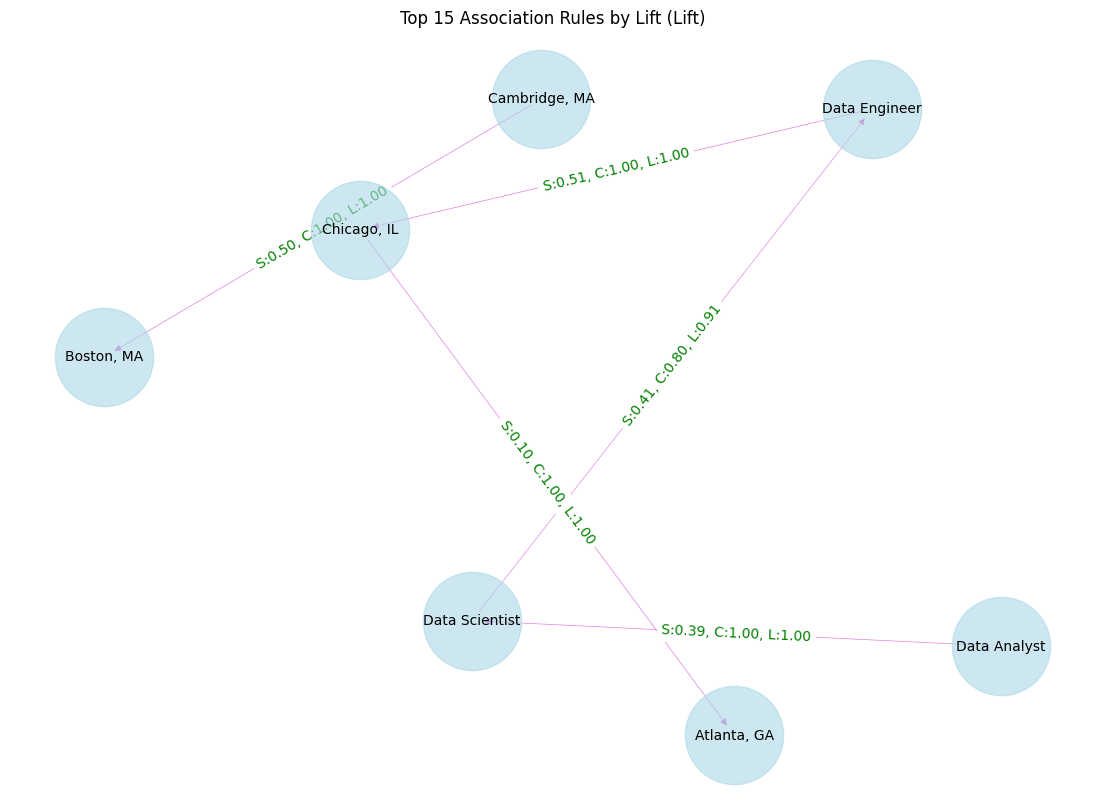

In [43]:
def draw_network_graph(rules, metric='lift', top_n=15, title_suffix=''):
    # Select the top N rules based on the given metric
    selected_rules = rules.nlargest(top_n, metric)

    # Create directed graph
    plt.figure(figsize=(14, 10))
    G = nx.DiGraph()

    # Add edges with attributes
    for _, row in selected_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        G.add_edge(antecedents, consequents,
                   weight=row[metric],
                   support=row['support'],
                   confidence=row['confidence'],
                   lift=row['lift'])

    # Graph layout
    pos = nx.spring_layout(G, k=1, iterations=20)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000, alpha=0.6)

    # Scale edge widths
    edge_widths = [G[u][v]['weight'] * 0.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='m')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edge labels
    edge_labels = dict([((u, v), f"S:{d['support']:.2f}, C:{d['confidence']:.2f}, L:{d['lift']:.2f}")
                        for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

    # Title
    plt.title(f"Top {top_n} Association Rules by {metric.capitalize()} {title_suffix}")
    plt.axis('off')
    plt.show()

# Example DataFrame (Replace this with your own rules dataset)
data = {
    'antecedents': [{'Data Scientist'}, {'Data Engineer'}, {'Data Analyst'}, {'Cambridge, MA'}, {'Chicago, IL'}],
    'consequents': [{'Data Engineer'}, {'Chicago, IL'}, {'Data Scientist'}, {'Boston, MA'}, {'Atlanta, GA'}],
    'support': [0.41, 0.51, 0.39, 0.50, 0.10],
    'confidence': [0.80, 1.00, 1.00, 1.00, 1.00],
    'lift': [0.91, 1.00, 1.00, 1.00, 1.00]
}

rules = pd.DataFrame(data)

# Generate visualizations
draw_network_graph(rules, metric='support', top_n=15, title_suffix='(Support)')
draw_network_graph(rules, metric='confidence', top_n=15, title_suffix='(Confidence)')
draw_network_graph(rules, metric='lift', top_n=15, title_suffix='(Lift)')


c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: 'support'

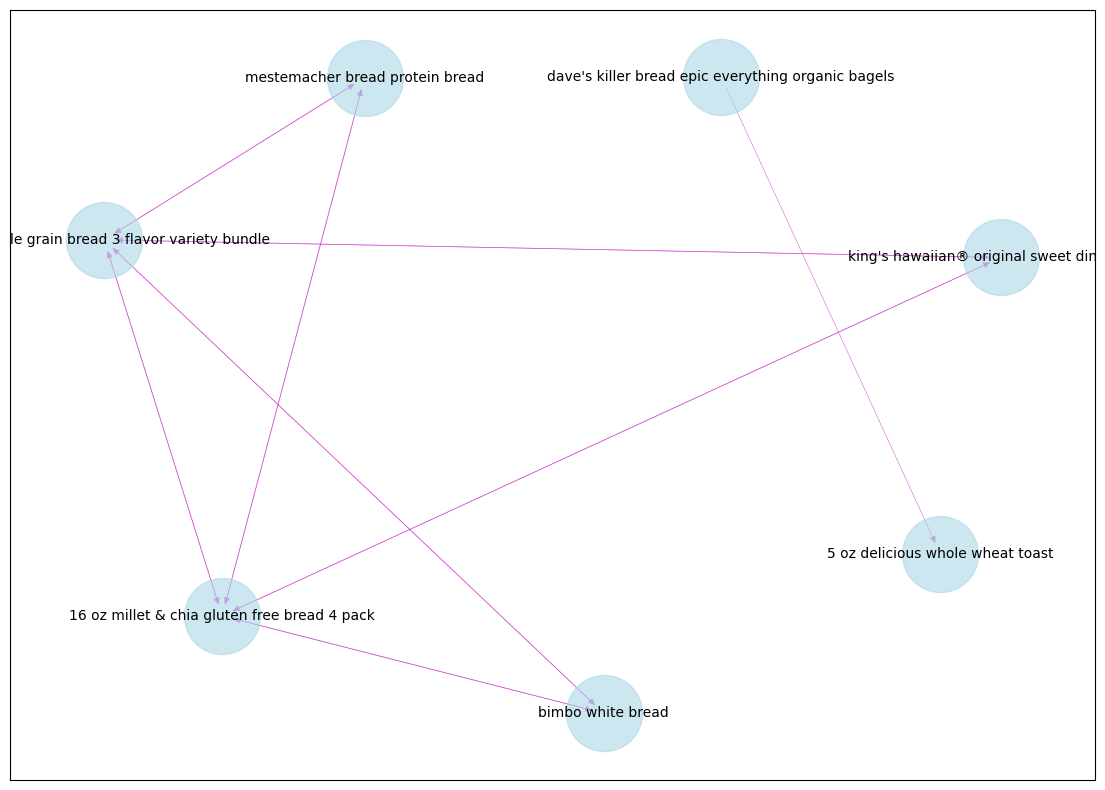

In [ ]:
def draw_network_graph(rules, metric='lift', top_n=15, title_suffix=''):
    selected_rules = rules.nlargest(top_n, metric)

    plt.figure(figsize=(14, 10))
    G = nx.DiGraph()  # ✅ Define G before using it

    for _, row in selected_rules.iterrows():
        antecedents = ', '.join(map(str, row['antecedents']))
        consequents = ', '.join(map(str, row['consequents']))
        G.add_edge(antecedents, consequents, weight=row[metric])


    pos = nx.spring_layout(G, k=2, iterations=50)  

    node_size = 3000  # ✅ Define node size
    edge_widths = [max(G[u][v]['weight'] * 0.3, 0.5) for u, v in G.edges()]  # ✅ Use G correctly

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_size, alpha=0.6)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='m')
    nx.draw_networkx_labels(G, pos, font_size=10)

    edge_labels = { (u, v): f"{d['support']:.4f}" for u, v, d in G.edges(data=True) }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

    plt.title(f'Top {top_n} Association Rules by {metric.capitalize()} {title_suffix}')
    plt.axis('off')
    plt.show()

# Filter rules with 'lift' > 1.0
rules_filtered = rules[rules['lift'] > 1.0]  # Adjust threshold if needed

# Generate visualizations
draw_network_graph(rules_filtered, metric='support', top_n=15, title_suffix='(Support)')
draw_network_graph(rules_filtered, metric='confidence', top_n=15, title_suffix='(Confidence)')
draw_network_graph(rules_filtered, metric='lift', top_n=15, title_suffix='(Lift)')


